In [111]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

In [112]:
def get_dataset():
    directory = 'dataset'
    files = os.listdir(directory)
    classes = []
    for file in files:
        classes.append(file.rstrip('.tsv'))
    
    dfs = []
    for file in files:
        file_path = 'dataset/'+file
        df = pd.read_csv(file_path, sep='\t')
        dfs.append(df)
    df = pd.concat(dfs, ignore_index=True)
    df = df.drop_duplicates()
    df = df.dropna()
    return df
    

In [113]:

def plotting(macroBNB, macroMNB, microBNB, microMNB, accBNB, accMNB):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 2, 1)
    plt.plot(macroBNB,color='r', marker='o', label='macroBNB')
    plt.plot(macroMNB,color='b', marker='o', label='macroMNB')
    plt.title('Macro Metrics')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.legend()
    plt.axhline(y=macroBNB.mean(), color='r', linestyle='--', label='macroBNB mean')
    plt.axhline(y=macroMNB.mean(), color='b', linestyle='--', label='macroMNB mean')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(microBNB,color='r', marker='o', label='microBNB')
    plt.plot(microMNB,color='b', marker='o', label='microMNB')
    plt.title('Micro Metrics')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.legend()
    plt.axhline(y=microBNB.mean(), color='r', linestyle='--', label='microBNB mean')
    plt.axhline(y=microMNB.mean(), color='b', linestyle='--', label='microMNB mean')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(accBNB, color='r',marker='o', label='accBNB')
    plt.plot(accMNB,color='b', marker='o', label='accMNB')
    plt.title('Accuracy Metrics')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.legend()
    plt.axhline(y=accBNB.mean(), color='r', linestyle='--', label='accBNB mean')
    plt.axhline(y=accMNB.mean(), color='b', linestyle='--', label='accMNB mean')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Orignal data preprocessing

In [114]:
nltk.download('stopwords')
nltk.download('punkt')

df = get_dataset()
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))


def org_preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return text
    
df['Release Year'] = df['Release Year'].astype(str)
df['Content'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['Content'] = df['Content'].apply(org_preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


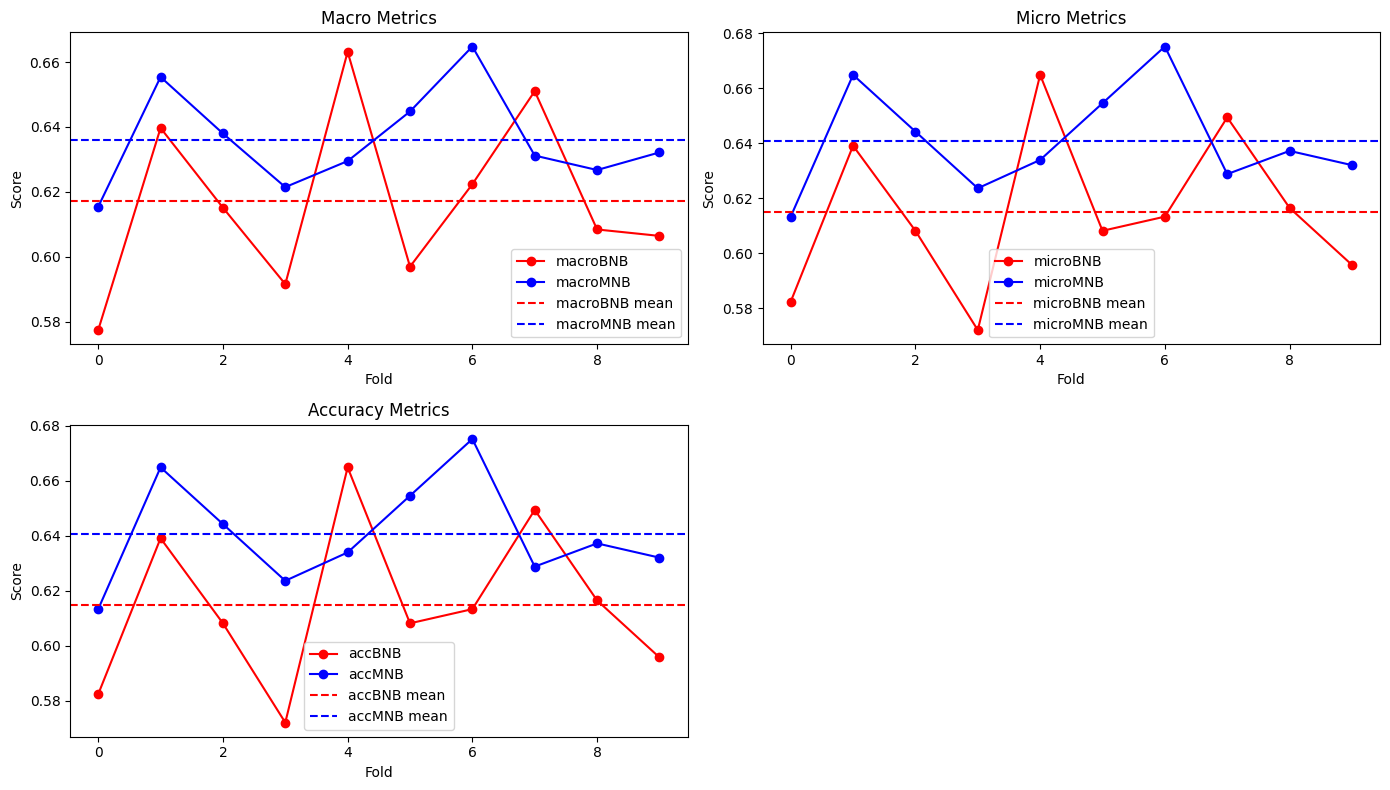

In [115]:
X = df['Content']
y = df['Genre']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
pipelineBNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer()),
    ('classifier', BernoulliNB())
])

pipelineMNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer()),
    ('classifier', MultinomialNB())
])
macroBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_macro')
macroMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_macro')
microBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_micro')
microMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_micro')
accBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='accuracy')
accMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='accuracy')

plotting(macroBNB,macroMNB,microBNB,microMNB,accBNB,accMNB)

# Modified Data preprocessing

In [116]:
df = get_dataset()

modify = r'[^\w\s\'-]'

def preprocess_text(text):
    text = text.lower()
    text = re.sub(modify, '', text) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)
    
    
df['Release Year'] = df['Release Year'].astype(str)
for col in df.columns:
    if col != 'Genre':
        df[col] = df[col].apply(preprocess_text)
df['Content'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

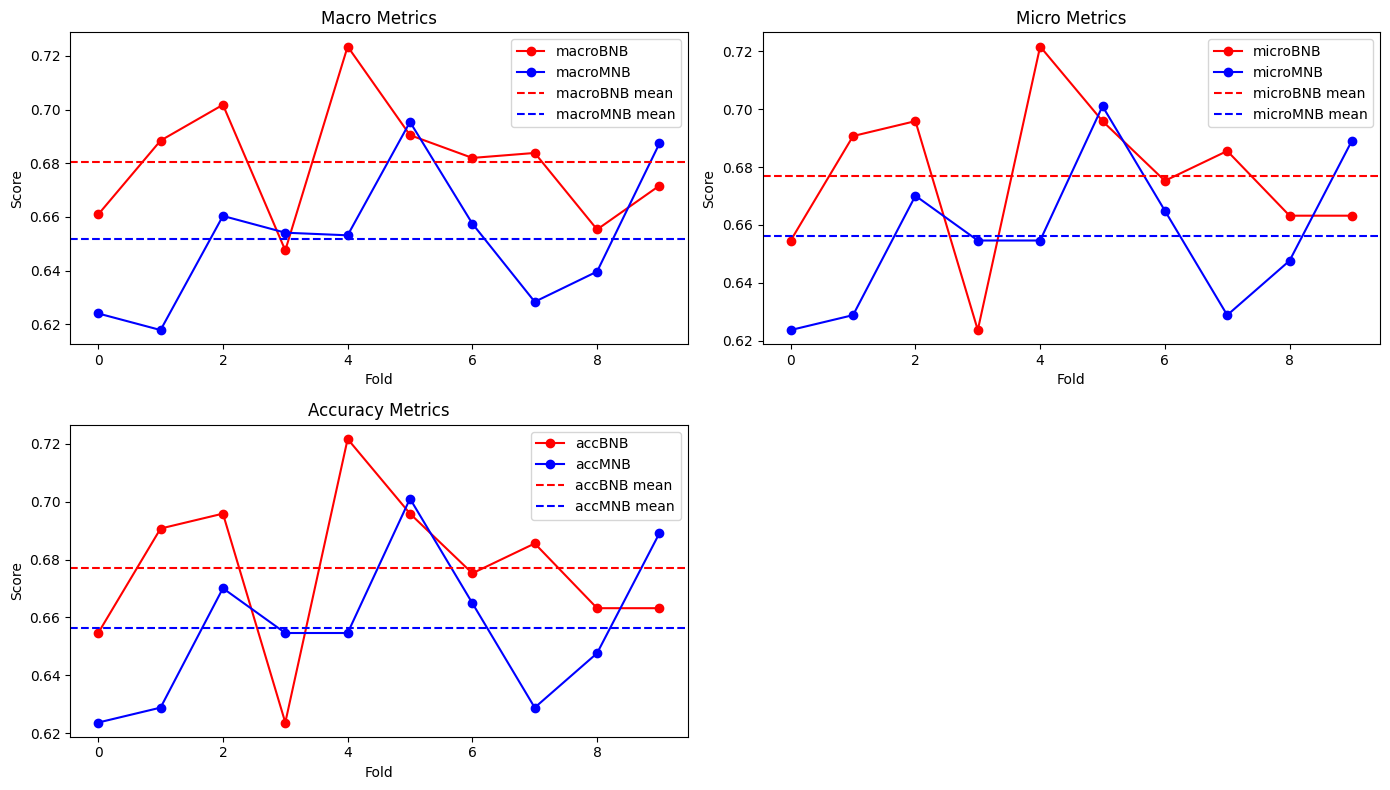

In [117]:
X = df['Content']
y = df['Genre']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
pipelineBNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer()),
    ('classifier', BernoulliNB())
])

pipelineMNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer()),
    ('classifier', MultinomialNB())
])
macroBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_macro')
macroMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_macro')
microBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_micro')
microMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_micro')
accBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='accuracy')
accMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='accuracy')

plotting(macroBNB,macroMNB,microBNB,microMNB,accBNB,accMNB)

# Apply top-K 

In [118]:
meanBNB = []
meanMNB = []
vect = CountVectorizer()
features = vect.fit_transform(X)
for k in range(1,int(features.shape[1])+1,100):
    pipelineBNB = Pipeline(steps=[
        ('preprocessor', CountVectorizer(max_features=k)),
        ('classifier', BernoulliNB())
    ])
    pipelineMNB = Pipeline(steps=[
        ('preprocessor', CountVectorizer(max_features=k)),
        ('classifier', MultinomialNB())
    ])
    microBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_micro')
    microMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_micro')
    meanBNB.append(microBNB.mean())
    meanMNB.append(microMNB.mean())


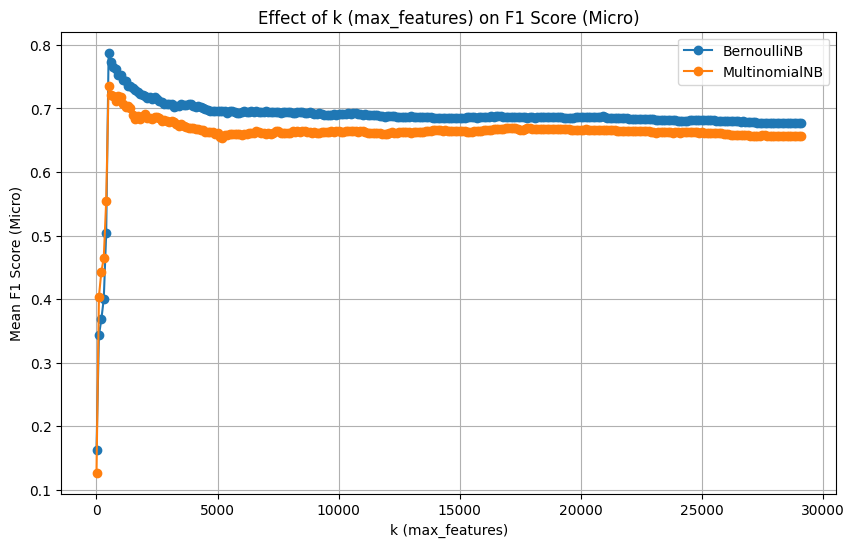

In [119]:
k_values = list(range(1,int(features.shape[1])+1,100))

plt.figure(figsize=(10, 6))
plt.plot(k_values, meanBNB, marker='o', label='BernoulliNB')
plt.plot(k_values, meanMNB, marker='o', label='MultinomialNB')
plt.xlabel('k (max_features)')
plt.ylabel('Mean F1 Score (Micro)')
plt.title('Effect of k (max_features) on F1 Score (Micro)')
plt.legend()
plt.grid(True)
plt.show()

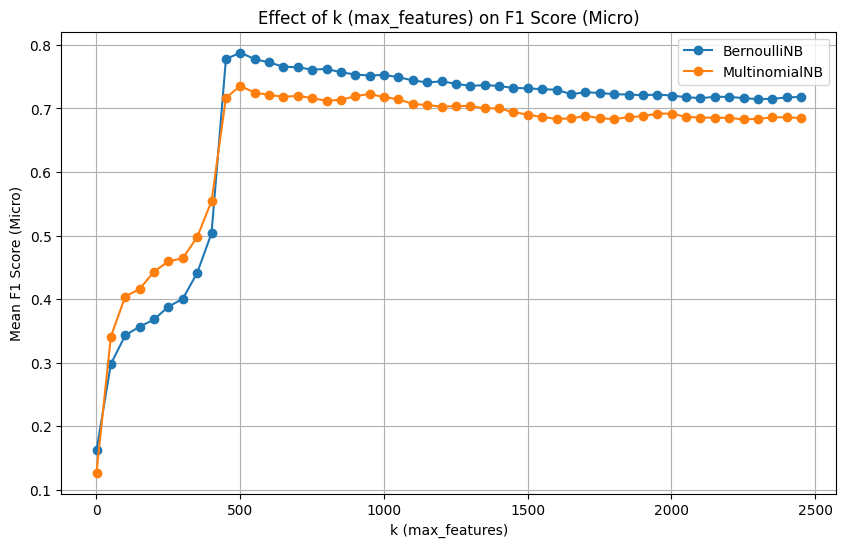

In [120]:
meanBNB = []
meanMNB = []
for k in range(1,2500,50):
    pipelineBNB = Pipeline(steps=[
        ('preprocessor', CountVectorizer(max_features=k)),
        ('classifier', BernoulliNB())
    ])
    pipelineMNB = Pipeline(steps=[
        ('preprocessor', CountVectorizer(max_features=k)),
        ('classifier', MultinomialNB())
    ])
    microBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_micro')
    microMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_micro')
    meanBNB.append(microBNB.mean())
    meanMNB.append(microMNB.mean())
k_values = list(range(1,2500,50))

plt.figure(figsize=(10, 6))
plt.plot(k_values, meanBNB, marker='o', label='BernoulliNB')
plt.plot(k_values, meanMNB, marker='o', label='MultinomialNB')
plt.xlabel('k (max_features)')
plt.ylabel('Mean F1 Score (Micro)')
plt.title('Effect of k (max_features) on F1 Score (Micro)')
plt.legend()
plt.grid(True)
plt.show()

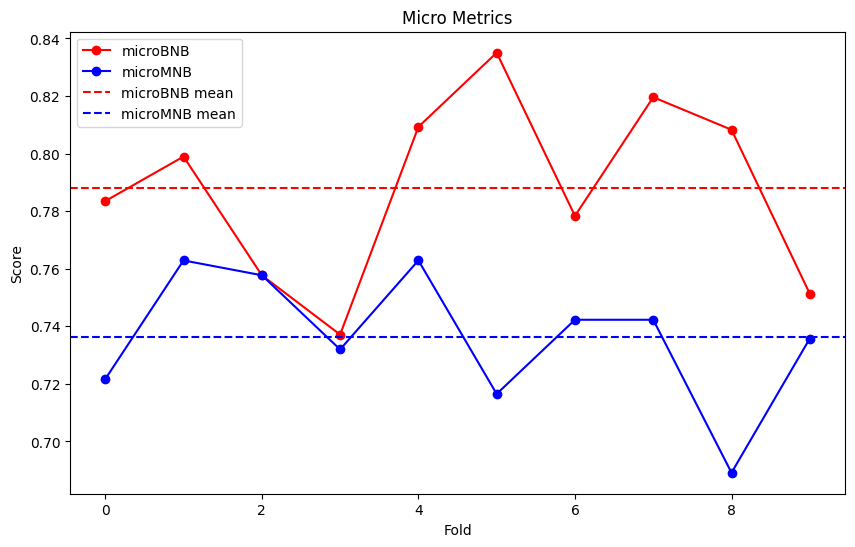

In [121]:
k = 500
pipelineBNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer(max_features=k)),
    ('classifier', BernoulliNB())
])
pipelineMNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer(max_features=k)),
    ('classifier', MultinomialNB())
])
microBNB = cross_val_score(pipelineBNB, X, y, cv=cv, scoring='f1_micro')
microMNB = cross_val_score(pipelineMNB, X, y, cv=cv, scoring='f1_micro')
plt.figure(figsize=(10, 6))
plt.plot(microBNB, color='r', marker='o', label='microBNB')
plt.plot(microMNB, color='b', marker='o', label='microMNB')
plt.title('Micro Metrics')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.axhline(y=microBNB.mean(), color='r', linestyle='--', label='microBNB mean')
plt.axhline(y=microMNB.mean(), color='b', linestyle='--', label='microMNB mean')
plt.legend()

# SVM

In [122]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
pipelineSVM = Pipeline(steps=[
    ('preprocessor', CountVectorizer(max_features=k)),
    ('classifier', SVC())
])

microSVM = cross_val_score(pipelineSVM, X, y, cv=cv, scoring='f1_micro')



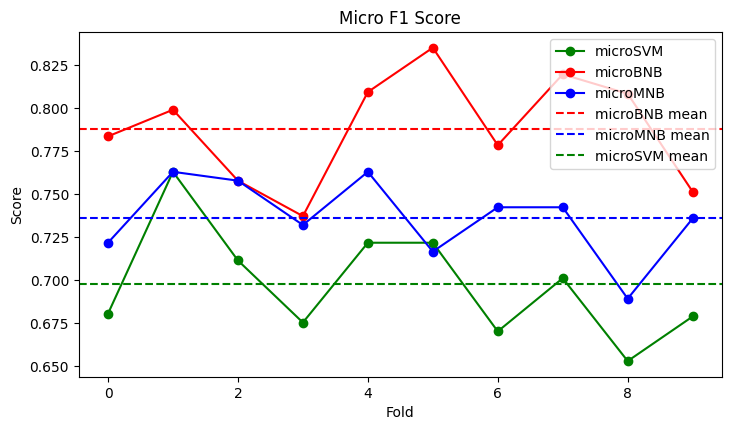

In [123]:
# Plot the results
plt.figure(figsize=(14, 8))

# Plot Micro F1
plt.subplot(2, 2, 2)
plt.plot(microSVM,color='g', marker='o', label='microSVM')
plt.plot(microBNB,color='r', marker='o', label='microBNB')
plt.plot(microMNB,color='b', marker='o', label='microMNB')
plt.title('Micro F1 Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.axhline(y=microBNB.mean(), color='r', linestyle='--', label='microBNB mean')
plt.axhline(y=microMNB.mean(), color='b', linestyle='--', label='microMNB mean')
plt.axhline(y=microSVM.mean(), color='g', linestyle='--', label='microSVM mean')
plt.legend()

plt.tight_layout()
plt.show()

In [124]:
def get_train_test():
    directory = 'dataset'
    files = os.listdir(directory)
    classes = []
    for file in files:
        classes.append(file.rstrip('.tsv'))
    train = []
    test = []
    for file in files:
        file_path = 'dataset/'+file
        df = pd.read_csv(file_path, sep='\t')
        train.append(df.iloc[:150])
        test.append(df.iloc[150:])
    train = pd.concat(train, ignore_index=True)
    test = pd.concat(test, ignore_index=True)
    train = train.drop_duplicates()
    train = train.dropna()
    test = test.drop_duplicates()
    test = test.dropna()
    return train, test

In [125]:
train, test = get_train_test()
def data_preprocess(df):
    df['Release Year'] = df['Release Year'].astype(str)
    for col in df.columns:
        if col != 'Genre':
            df[col] = df[col].apply(preprocess_text)
    df['Content'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    return df['Content']
train['Content'] = data_preprocess(train)
test['Content'] = data_preprocess(test)

In [126]:
k=500
pipelineBNB = Pipeline(steps=[
    ('preprocessor', CountVectorizer(max_features=k)),
    ('classifier', BernoulliNB())
])
pipelineBNB.fit(train['Content'],train['Genre'])
preds = pipelineBNB.predict(train['Content'])
train["preds"] = preds

In [127]:
user1 = pd.read_csv('user1.tsv', sep='\t')
user1.columns = ['Genre','Interests']
user2 = pd.read_csv('user2.tsv', sep='\t')
user2.columns = ['Genre','Interests']

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
user1['Content'] = user1.iloc[:, [1]]
user1['Content'] = user1['Content'].apply(preprocess_text)
user2['Content'] = user2.iloc[:, [1]]
user2['Content'] = user2['Content'].apply(preprocess_text)
user1_dict = dict(zip(user1['Genre'], user1['Content']))
train["user1_interests"] = train['preds'].map(user1_dict)
user2_dict = dict(zip(user2['Genre'], user2['Content']))
train["user2_interests"] = train['preds'].map(user2_dict)

train['user1_interests'] = train['user1_interests'].fillna('')
train['user2_interests'] = train['user2_interests'].fillna('')

In [129]:
from sklearn.metrics.pairwise import cosine_similarity
content_tfidf = tfidf.fit_transform(train['Content'])
interests_tfidf = tfidf.transform(train['user1_interests'])
similarities = cosine_similarity(content_tfidf, interests_tfidf)
train['user1_match'] = similarities.diagonal()
content_tfidf = tfidf.fit_transform(train['Content'])
interests_tfidf = tfidf.transform(train['user2_interests'])
similarities = cosine_similarity(content_tfidf, interests_tfidf)
train['user2_match'] = similarities.diagonal()
result1 = train[train['user1_match'] > 0]
result2 = train[train['user2_match'] > 0]

In [130]:
print(result1.shape)
print(result2.shape)

(371, 13)
(51, 13)


In [131]:
grouped1 = result1.groupby('preds')['Content'].apply(' '.join).reset_index()
grouped2 = result2.groupby('preds')['Content'].apply(' '.join).reset_index()

In [132]:
def get_top20(grouped):
    tfidf = TfidfVectorizer()
    grouped_tfidf = tfidf.fit_transform(grouped['Content']).toarray()
    vocab = tfidf.vocabulary_
    reverse_vocab = {v:k for k,v in vocab.items()}
    feature_names = tfidf.get_feature_names_out()
    df_tfidf = pd.DataFrame(grouped_tfidf, columns = feature_names)
    idx = grouped_tfidf.argsort(axis=1)
    tfidf_max20 = idx[:,-20:]
    df_tfidf['top20'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max20 ]
    grouped['top20'] = df_tfidf['top20']
    return grouped['top20']

In [133]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
grouped1['top20'] = get_top20(grouped1)
group1_dict = dict(zip(grouped1['preds'], grouped1['top20']))
user1['top20'] = user1['Genre'].map(group1_dict)
grouped2['top20'] = get_top20(grouped2)
group2_dict = dict(zip(grouped2['preds'], grouped2['top20']))
user2['top20'] = user2['Genre'].map(group2_dict)

In [134]:
user1

,Genre,Interests,Content,top20
0,comedy,Carrey Carell Stiller Ferrell chase,carrey carel stiller ferrel chase,"[debora, frank, lou, jones, mac, roxi, marti, go, back, ben, peng, darnel, cam, dusti, wade, burt, get, doc, jame, brad]"
1,drama,family wedding disaster,famili wed disast,"[return, leav, ito, mitsuha, find, old, auggi, elio, john, mother, tell, drama, friend, home, school, year, father, ana, jack, famili]"
2,family,pirate baseball holiday hockey Christmas Santa,pirat basebal holiday hockey christma santa,"[take, dumbledor, get, find, bombay, one, santa, grinch, return, justin, eileen, chipmunk, jami, akeelah, tell, lacey, bathsheba, harri, duck, christma]"
3,horror,ghost vampire curse video footage virus,ghost vampir curs video footag viru,"[shark, one, leav, see, attack, home, tsubasa, bodi, later, death, reveal, joseph, mullet, charley, tell, hous, find, koyomi, kill, vampir]"
4,romance,boyfriend girlfriend Bollywood dance,boyfriend girlfriend bollywood danc,"[two, leav, fran, tamsin, one, friend, find, mona, time, kate, viann, rafael, katey, love, nick, suna, rinko, romance, danc, takeo]"
5,sci-fi,spaceship alien virus UFO robot clone,spaceship alien viru ufo robot clone,"[dr, attack, predat, use, back, discov, crew, escap, planet, one, creatur, find, human, sci, fi, earth, ship, kill, robot, alien]"
6,thriller,crime trial murder suspense killer kill spy,crime trial murder suspens killer kill spi,"[hous, shoot, attempt, back, sara, home, reveal, take, michael, murder, car, man, tell, call, leav, thriller, one, polic, find, kill]"


In [135]:
user2

,Genre,Interests,Content,top20
0,comedy,road trip,road trip,"[home, frank, tell, take, leav, back, plan, famili, meet, kiki, tatiana, friend, mildr, go, ryan, marti, stifler, cam, get, greg]"
1,family,magic adventure,magic adventur,"[mother, get, go, saki, see, hous, leav, take, return, one, children, back, pinocchio, tell, father, magic, max, harri, ella, find]"
